# Model : Classification Model using Titanic Data  

#### Build Logistic Regression Model to Predict the Survival of a Titanic Passenger

Knowing all attributes of a passenger, can we predict whether the passenger will survive?

## Overview

####  Part 1: Build Logistic Regression Classification Model

Read the cleaned Titanic dataset

Split data into train, validation, test 

Build classification model using SKLearn API and using default parameters

Model performance on validation data 

Model performance on test data

Plot performance metrics


#### Part 2: Perform Cross Validation

#### Part 3: Perform Probability Calibration 

## Special Note

For ML model building, we are using. scikit-learn API. 

The classification algorithms in sklean use the following convention about the class labels of the data:

Negative Class : 0

Positive Class : 1

-------------------------

## Load Python Modules

In [149]:
import pandas as pd
import numpy as np

In [150]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [151]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [152]:
from sklearn.linear_model import LogisticRegression 

## Part 1 : Build Logistic Regression Model

### 1.1 : Read Data

In [153]:
"""Import Jupyter Notebook"""

import import_ipynb
import bootcamp_data_processing as bdp

In [154]:
train_df.head()

,Pclass,Survived,Age,SibSp,Parch,Fare,NameLength,FamilySize,Name,Sex,Ticket,Cabin,Embarked,HomeDest,LastName,Title
0,2,1,28.0,0,0,12.6500,32,1,1197,0,186,186,2,74,608,8
1,2,1,18.0,0,1,23.0000,19,2,336,0,149,186,2,292,279,6
2,1,0,36.0,1,0,78.8500,29,2,216,1,118,87,2,190,706,7
3,1,1,48.0,0,0,25.9292,51,1,1164,0,112,121,2,48,514,8
4,1,0,67.0,1,0,221.7792,18,2,1150,1,796,95,2,236,316,7


Get the pre-processed data

In [155]:
train_df, test_df = bdp.train_test_ordinal
# train_df, test_df = bdp.train_test_onehot

In [156]:
train_df.shape

(982, 16)

In [157]:
train_df.columns

Index(['Pclass', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'NameLength',
       'FamilySize', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'HomeDest',
       'LastName', 'Title'],
      dtype='object')

In [158]:
test_df.shape

(327, 16)

Ignore this cell for the first run. We will come back to this cell later on

In [189]:
#train_df.drop(columns=['Boat'], inplace=True)
#test_df.drop(columns=['Boat'], inplace=True)

#### Create preditors (X) and response (y) to be used as model inputs

In [190]:
X = train_df.drop(columns=['Survived'], axis=1)
y = train_df.Survived

### 1.2 : Split Data

Set the seed to a specific integer 

In [191]:
rand_seed = 42

Split training dataset in to train and validation data sets

In [192]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.90, random_state=rand_seed)

In [193]:
print(f'shape of the train data: {X_train.shape}')
print(f'shape of the valid data: {X_valid.shape}')

shape of the train data: (883, 15)
shape of the valid data: (99, 15)


Format test data set

In [194]:
X_test = test_df.drop('Survived', axis=1)
y_test = test_df.Survived
print(f'shape of the test data : {X_test.shape}')

shape of the test data : (327, 15)


### 1.3 : Scale the Data

In [195]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [196]:
scalar  = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.fit_transform(X_valid)
X_test  = scalar.fit_transform(X_test)

### 1.4 : Train Model

#### 1.4.1 : Setting Weight to the Data

In [197]:
# sample_weight = np.random.rand(X_train.shape[0], )

#### 1.4.2 : Logistic Regression Model 

Logistic Rergression Parameter List:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### 1.4.3 : Define model

We can define a modelin two different ways:

1. Create a parameter dictionary and insert the  dictionary inside the model object
2. Build the model bydirectly using parameters 

In [198]:
# param_grid = {
#     'penalty' : 'l2', 
#     'dual' : False, 
#     'tol' : 0.0001, 
#     'C' : 1.0, 
#     'fit_intercept' : True, 
#     'intercept_scaling' : 1, 
#     'class_weight' : None, 
#     'random_state' : None, 
#     'solver' : 'lbfgs', 
#     'max_iter' : 100, 
#     'multi_class' : 'auto', 
#     'verbose' : 0, 
#     'warm_start' : False, 
#     'n_jobs' : None, 
#     'l1_ratio' : None
# }

# model = LogisticRegression()
# model.set_params( **param_grid )

In [199]:
model = LogisticRegression(
    penalty='l2', 
    dual=False, 
    tol=0.0001, 
    C=1.0, 
    fit_intercept=True, 
    intercept_scaling=1, 
    class_weight=None, 
    random_state=42, 
    solver='lbfgs', 
    max_iter=100, 
    multi_class='auto', 
    verbose=0, 
    warm_start=False, 
    n_jobs=2, 
    l1_ratio=None
)

In [200]:
# model.get_params()

#### 1.4.4 : Fit the Model

In [201]:
fit = model.fit(
    X_train, y_train,
    sample_weight=None
)

In [202]:
print("class label's order in predict_proba:", model.classes_)

class label's order in predict_proba: [0 1]


### 1.5 : Model Performance on Validation Dataset

In [203]:
y_pred  = model.predict(X_valid)

In [204]:
y_score = model.predict_proba(X_valid)

####  1.5.1 Performance Metrics

In [205]:
from sklearn import metrics

In [206]:
"""Accuracy Score"""
accuracy = metrics.accuracy_score(y_valid, y_pred, sample_weight=None, normalize=True)
print( round(accuracy, 4))

0.7677


In [207]:
"""Balanced Accuracy Score"""
balanced_accuracy = metrics.balanced_accuracy_score(y_valid, y_pred, sample_weight=None, adjusted=False)
print( round(balanced_accuracy, 4))

0.7256


In [208]:
"""ROC Curve"""
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_score[:,1])

In [209]:
"""AUC"""
auc = metrics.auc(fpr, tpr)
print( round(auc, 4))

0.796


In [210]:
"""Confusion Matrix"""
metrics.confusion_matrix(y_valid, y_pred)

array([[57, 11],
       [12, 19]], dtype=int64)

In [211]:
tn, fp, fn, tp = metrics.confusion_matrix(y_valid, y_pred).ravel()
print(f"TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}")

TN:57, FP:11, FN:12, TP:19


In [212]:
"""F1 Score"""
f1 = metrics.f1_score(
    y_valid, y_pred, 
    labels=None, 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(f1, 4))

0.623


In [213]:
"""Log Loss"""
metrics.log_loss(y_valid, y_score[:, 1], normalize=True, sample_weight=None, labels=[0,1])

0.49626558972406376

In [214]:
"""Precision, Recall, Fscore, Support"""
metrics.precision_recall_fscore_support(
    y_valid, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average=None, 
    sample_weight=None
)

(array([0.82608696, 0.63333333]),
 array([0.83823529, 0.61290323]),
 array([0.83211679, 0.62295082]),
 array([68, 31], dtype=int64))

In [215]:
precision = metrics.precision_score(
    y_valid, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(precision, 4))

0.6333


In [216]:
recall = metrics.recall_score(
    y_valid, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(recall, 4))

0.6129


### 1.6 : Model Performance on Test Dataset

In [217]:
y_pred = model.predict(X_test)

In [218]:
y_score = model.predict_proba(X_test)

#### 1.6.1 Performance Metrics

In [219]:
from sklearn import metrics

In [220]:
"""Accuracy Score"""
accuracy = metrics.accuracy_score(y_test, y_pred, sample_weight=None, normalize=True)
print( round(accuracy, 4))

0.7706


In [221]:
"""Balanced Accuracy Score"""
balanced_accuracy = metrics.balanced_accuracy_score(
    y_test, y_pred, 
    sample_weight=None, 
    adjusted=False
)

print( round(balanced_accuracy, 4))

0.7512


In [222]:
"""ROC Curve"""
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])

In [223]:
"""AUC"""
auc = metrics.auc(fpr, tpr)
print( round(auc, 4))

0.8355


In [224]:
"""Confusion Matrix"""
metrics.confusion_matrix(y_test, y_pred)

array([[168,  33],
       [ 42,  84]], dtype=int64)

In [225]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}")

TN:168, FP:33, FN:42, TP:84


In [226]:
"""F1 Score"""
f1 = metrics.f1_score(
    y_test, y_pred, 
    labels=None, 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(f1, 4))

0.6914


In [227]:
"""Log Loss"""
metrics.log_loss(
    y_test, y_score[:, 1], 
    normalize=True, 
    sample_weight=None, 
    labels=[0,1]
)

0.4745943639407756

In [228]:
"""Precision, Recall, Fscore, Support"""
metrics.precision_recall_fscore_support(
    y_test, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average=None, 
    sample_weight=None
)

(array([0.8       , 0.71794872]),
 array([0.8358209 , 0.66666667]),
 array([0.81751825, 0.69135802]),
 array([201, 126], dtype=int64))

In [229]:
precision = metrics.precision_score(
    y_test, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(precision, 4))

0.7179


In [230]:
recall = metrics.recall_score(
    y_test, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(recall, 4))

0.6667


#### 1.6.2 : Plots of Performance Metrics

Confusion Metrix

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

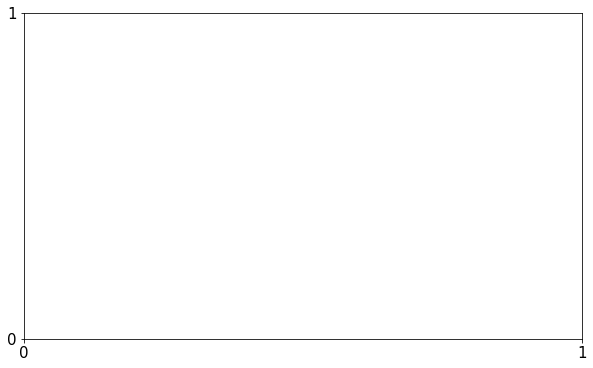

In [231]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlabel("", fontdict={'size':15})
ax.set_ylabel("", fontdict={'size':15})

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['0','1'], fontdict={'size':15})
ax.set_yticklabels(['0','1'], fontdict={'size':15})


metrics.ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    normalize=None, 
    sample_weight=None, 
    labels=None, 
    display_labels=[0,1], 
    cmap='Blues', #'OrRd', 
    ax=ax)

plt.show()

ROC Curve

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

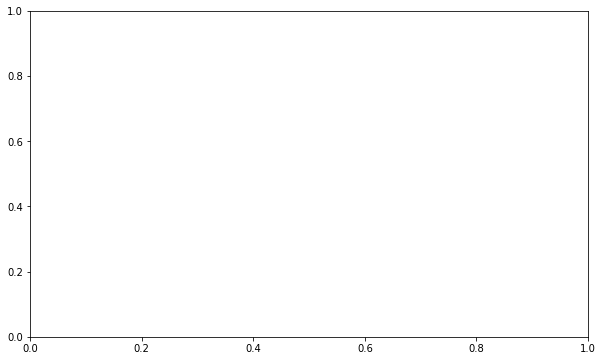

In [232]:
fig, ax = plt.subplots(figsize=(10,6))

metrics.RocCurveDisplay.from_estimator(model, X_test, y_test, sample_weight=None, ax=ax)

PR Curve

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
metrics.PrecisionRecallDisplay.from_estimator(model, X_test, y_test, sample_weight=None, ax=ax)

#### 1.6.3 : Feature Importance

In [ ]:
"""
    In Logistic Regression 
    Model coefficients are generally considered as feature importance 
"""

#  Create column name and coresponsing model coefficient dataframe 
colNames = train_df.drop(columns=['Survived']).columns.values
colCoeff = model.coef_[0]
name_coef = pd.DataFrame( np.column_stack((colNames, colCoeff)), columns=['ColName','Coeff'])
name_coef = name_coef.sort_values(by='Coeff', inplace=False)

name_coef.head(3)

In [ ]:
# """Plot using Pandas Plotting Routine"""
# fig, ax = plt.subplots(figsize=(12,7))

# _imp = name_coef.set_index(keys=['ColName'])
# _imp.plot(kind='barh', ax=ax, fontsize=12)

# plt.show()

In [ ]:
"""Plot using Seaborn Plotting Routine"""

import seaborn as sns

fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(y='ColName', x='Coeff',  data=name_coef, orient='h', palette='Blues')
ax.set_xlabel("Correlation Strength", fontdict={'size':14})
ax.set_ylabel("Feature Name", fontdict={'size':14})

plt.show()

-----------------

## Part 2 : Perfom Cross-Validation 

Cross-Validation can be implement in two different ways. We will explore both of these methods.

To implement CV, the data is not needed to be divided manually into 'train' and 'valid'. 

### 2.1 : Normalize Datasets  

In [ ]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df.Survived
X_test  = test_df.drop('Survived', axis=1)
y_test  = test_df.Survived

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scalar = MinMaxScaler()
X_train_scale = scalar.fit_transform(X_train)
X_test_scale = scalar.fit_transform(X_test)

### 2.2 : Cross-Validation using 'cross_val_predict'

####  Warning 
Method 1 does not produce a model object. It can not be applied to  predict test data.

Despite this setback, it is still a valuable way to  explore cross validation.    

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

In [233]:
model_cv = LogisticRegression(
    penalty='l2', 
    dual=False, 
    tol=0.0001, 
    C=1.0, 
    fit_intercept=True, 
    intercept_scaling=1, 
    class_weight=None, 
    random_state=42, 
    solver='lbfgs', 
    max_iter=100, 
    multi_class='auto', 
    verbose=0, 
    warm_start=False, 
    n_jobs=2, 
    l1_ratio=None
)

#### Predict Classes

In [234]:
y_pred_cv = cross_val_predict(
    model_cv, 
    X_train_scale, y_train, 
    cv=5, 
    n_jobs=2, 
    verbose=0,
    method='predict'
)

NameError: name 'cross_val_predict' is not defined

#### Predict Probabilities

In [235]:
y_score_cv = cross_val_predict(
    model_cv, 
    X_train_scale, y_train, 
    cv=5, 
    n_jobs=2, 
    verbose=0,
    method='predict_proba'
)

NameError: name 'cross_val_predict' is not defined

Validation Scores

In [236]:
score_cv = cross_val_score(model_cv, X_train_scale, y_train, scoring='accuracy', cv=5)
score_cv

NameError: name 'cross_val_score' is not defined

In [237]:
score_cv = cross_validate(model_cv, X_train_scale, y_train, scoring=['accuracy','roc_auc','f1'], cv=5)
score_cv

NameError: name 'cross_validate' is not defined

#### Show the number of Miss-classifications 

In [238]:
y_diff = y_train.to_numpy() - y_pred_cv
diff = pd.DataFrame(y_diff, columns=['Delta'], dtype=object)


b,c = np.unique(y_diff, return_counts=True)
print( list(zip(b,c)) )


# Method 1
# fig, ax = plt.subplots( figsize=(10,5) )
# tmp = diff.groupby(['Delta'], as_index=False).size()
# sns.barplot(x='Delta', y='size', hue='Delta', data=tmp, orient='v')


# Method 2
g = sns.catplot(
    x='Delta', kind='count',
    data=diff,
    height=4.25, 
    aspect=2.5,
    legend=True,
    #palette='Reds'
)

g.fig.suptitle('The number of Miss-classifications')
g.set_xlabels('Delta: 0=Correct Classfication', fontdict={'size':14}) 


plt.show()

NameError: name 'y_pred_cv' is not defined

### 2.3 : Cross-Validation using 'LogisticRegressionCV'

In [239]:
from sklearn.linear_model import LogisticRegressionCV

In [240]:
model_cv = LogisticRegressionCV(
    Cs=10, 
    fit_intercept=True, 
    cv=5, 
    dual=False, 
    penalty='l2', 
    scoring=None, 
    solver='lbfgs', #'liblinear',
    tol=0.0001, 
    max_iter=200, 
    class_weight=None, 
    n_jobs=2, 
    verbose=0, 
    refit=True, 
    intercept_scaling=1.0, 
    multi_class='auto', 
    random_state=42, 
    l1_ratios=None
)

In [241]:
fit_cv = model_cv.fit(
    X_train_scale, 
    y_train,
    sample_weight=None)

NameError: name 'X_train_scale' is not defined

In [242]:
print("class label's order in predict_proba:", model_cv.classes_)

AttributeError: 'LogisticRegressionCV' object has no attribute 'classes_'

#### Predict Classes

In [243]:
y_pred_cv = model_cv.predict(X_test_scale)

NameError: name 'X_test_scale' is not defined

#### Predict Probabilities

In [244]:
y_score_cv    = model_cv.predict_proba(X_test_scale)
y_logscore_cv = model_cv.predict_log_proba(X_test_scale)

NameError: name 'X_test_scale' is not defined

####  The Distribution of Predicted Probabilities

NameError: name 'y_score_cv' is not defined

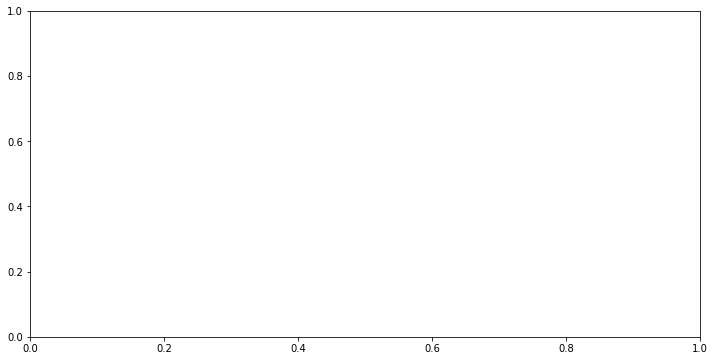

In [245]:
fig, ax = plt.subplots( figsize=(12,6) )

#sns.histplot(y_score_cv[:,0], alpha=1.0, palette='Reds', stat="count")
sns.histplot(y_score_cv[:,1], alpha=0.1, palette='Blues',stat="count")

ax.set_xlim(0.00, 1.00)

plt.show()

----------------

## Part 3 : Advanced Topic : Perform Probability Calibration

https://scikit-learn.org/stable/modules/calibration.html#calibration

In [246]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

ImportError: cannot import name 'CalibrationDisplay' from 'sklearn.calibration' (C:\Users\Pappu\anaconda3\lib\site-packages\sklearn\calibration.py)

### 3.1 : Calibrate Probabilities

In [247]:
model_iso = CalibratedClassifierCV(
    base_estimator=model_cv, 
    method='isotonic', 
    cv='prefit'
)

fit_iso = model_iso.fit(X_test_scale, y_test)


y_pred_iso  = model_iso.predict(X_test_scale)
y_score_iso = model_iso.predict_proba(X_test_scale)

NameError: name 'X_test_scale' is not defined

In [ ]:
model_sig = CalibratedClassifierCV(
    base_estimator=model_cv, 
    method='sigmoid', 
    cv='prefit'
)


fit_sig = model_sig.fit(X_test_scale, y_test)

y_pred_sig  = model_sig.predict(X_test_scale)
y_score_sig = model_sig.predict_proba(X_test_scale)

### 3.2 : Display Calibrated Probabilities

Using Model Outputs (Probabilities)

NameError: name 'y_score_cv' is not defined

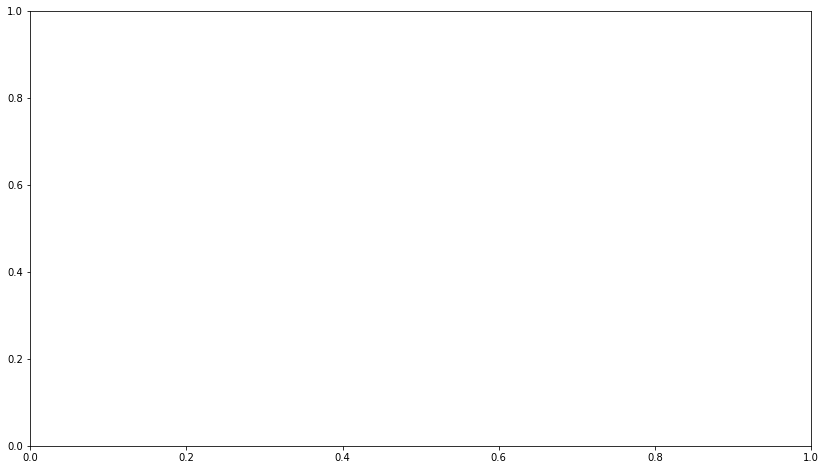

In [248]:
fig, ax = plt.subplots( figsize=(14, 8) )

model_score_list = [
    (y_score_cv[:, 1], "Logistic"),
    (y_score_iso[:,1], "Logistic + Isotonic"),
    (y_score_sig[:,1], "Logistic + Sigmoid"),
]

colors = plt.cm.get_cmap("Dark2")

for i, (y_score, name) in enumerate(model_score_list):
    display = CalibrationDisplay.from_predictions(
        y_test, y_score,
        n_bins=10, 
        name=name,
        ax=ax,
        color=colors(i)
    )

plt.show()

Using Model Estimators

In [ ]:
model_list = [
    (model_cv,  "Logistic"),
    (model_iso, "Logistic + Isotonic"),
    (model_sig, "Logistic + Sigmoid"),
]


fig = plt.figure( figsize=(14,12) )
gds = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot( gds[:2, :2] )
calibration_displays = {}

for i, (clf, name) in enumerate(model_list):
    clf.fit(X_train_scale, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_scale,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Logistic Regression)", fontdict={'size':16})

# # Add histogram
# grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
# for i, (_, name) in enumerate(model_list):
#     row, col = grid_positions[i]
#     ax = fig.add_subplot(gs[row, col])

#     ax.hist(
#         calibration_displays[name].y_prob,
#         range=(0, 1),
#         bins=10,
#         label=name,
#         color=colors(i),
#     )
#     ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [249]:
from sklearn.metrics import brier_score_loss

print("Brier score losses: (the smaller the better)")

clf_score = brier_score_loss(y_test, y_pred, sample_weight=None)
print("No calibration: {0:0.3f}".format(clf_score))

print('')

clf_isotonic_score = brier_score_loss(y_test, y_pred_iso, sample_weight=None)
print("With isotonic calibration: {0:0.4f}".format(clf_isotonic_score))

clf_sigmoid_score = brier_score_loss(y_test, y_pred_sig, sample_weight=None)
print("With sigmoid calibration : {0:0.4f}".format(clf_sigmoid_score) )

Brier score losses: (the smaller the better)
No calibration: 0.229



NameError: name 'y_pred_iso' is not defined